# Group 6 Project

In [46]:
from datasets import load_dataset
import plotly.express as px
from itertools import chain
from collections import Counter, OrderedDict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
# Login using e.g. `huggingface-cli login` to access this dataset  (run this in console, with venv activated)

dataset = load_dataset("mteb/twentynewsgroups-clustering", revision="6125ec4e24fa026cec8a478383ee943acfbd5449")
print(dataset)

DatasetDict({
    test: Dataset({
        features: ['sentences', 'labels'],
        num_rows: 10
    })
})


In [3]:
print(dataset.keys())

dict_keys(['test'])


### Extracting variables:

In [4]:
test = dataset["test"]
texts_sep = list(test["sentences"])
labels_sep = list(test["labels"])

## Understanding the Dataset

In [5]:
print(test[0].keys())
print(len(test))

print(test[0]["sentences"][0], '=>', test[0]["labels"][0])
print(test[0]["sentences"][1], '=>', test[0]["labels"][1])
print(test[0]["sentences"][2], '=>', test[0]["labels"][2])

# each sentence and which group it belongs to

dict_keys(['sentences', 'labels'])
10
Motorola MC143150 and MC143120 => 12
Windows 3.1(new) for sale $35 => 6
Gospel Dating => 0


In [6]:
total = set()
for i in range(len(test)):
    total = total.union(set(test[i]["labels"]))
total  # there are around 20 groups

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [7]:
texts = []
for text in texts_sep:
    texts.extend(text)
print("number of texts: ", len(texts))

number of texts:  59545


In [31]:
labels_list = list(chain.from_iterable(labels_sep))
label_counts = OrderedDict(sorted(Counter(labels_list).items()))
len(labels_list)  # total records in general

59545

In [36]:
px.bar(x=[str(_) for _ in label_counts.keys()], y=label_counts.values(), labels={"x": "labels", "y": "count of appearance"})

In [47]:
get_from = lambda x: [texts[i] for i, val in enumerate(labels_list) if val == x]
get_word_cloud = lambda x: WordCloud(stopwords=STOPWORDS, max_words=100).generate(x)

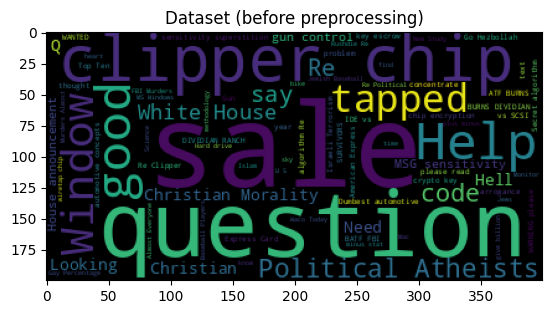

In [49]:
# before preprocessing

cloud = get_word_cloud(" ".join(texts))
plt.title("Dataset (before preprocessing)")
plt.imshow(cloud)

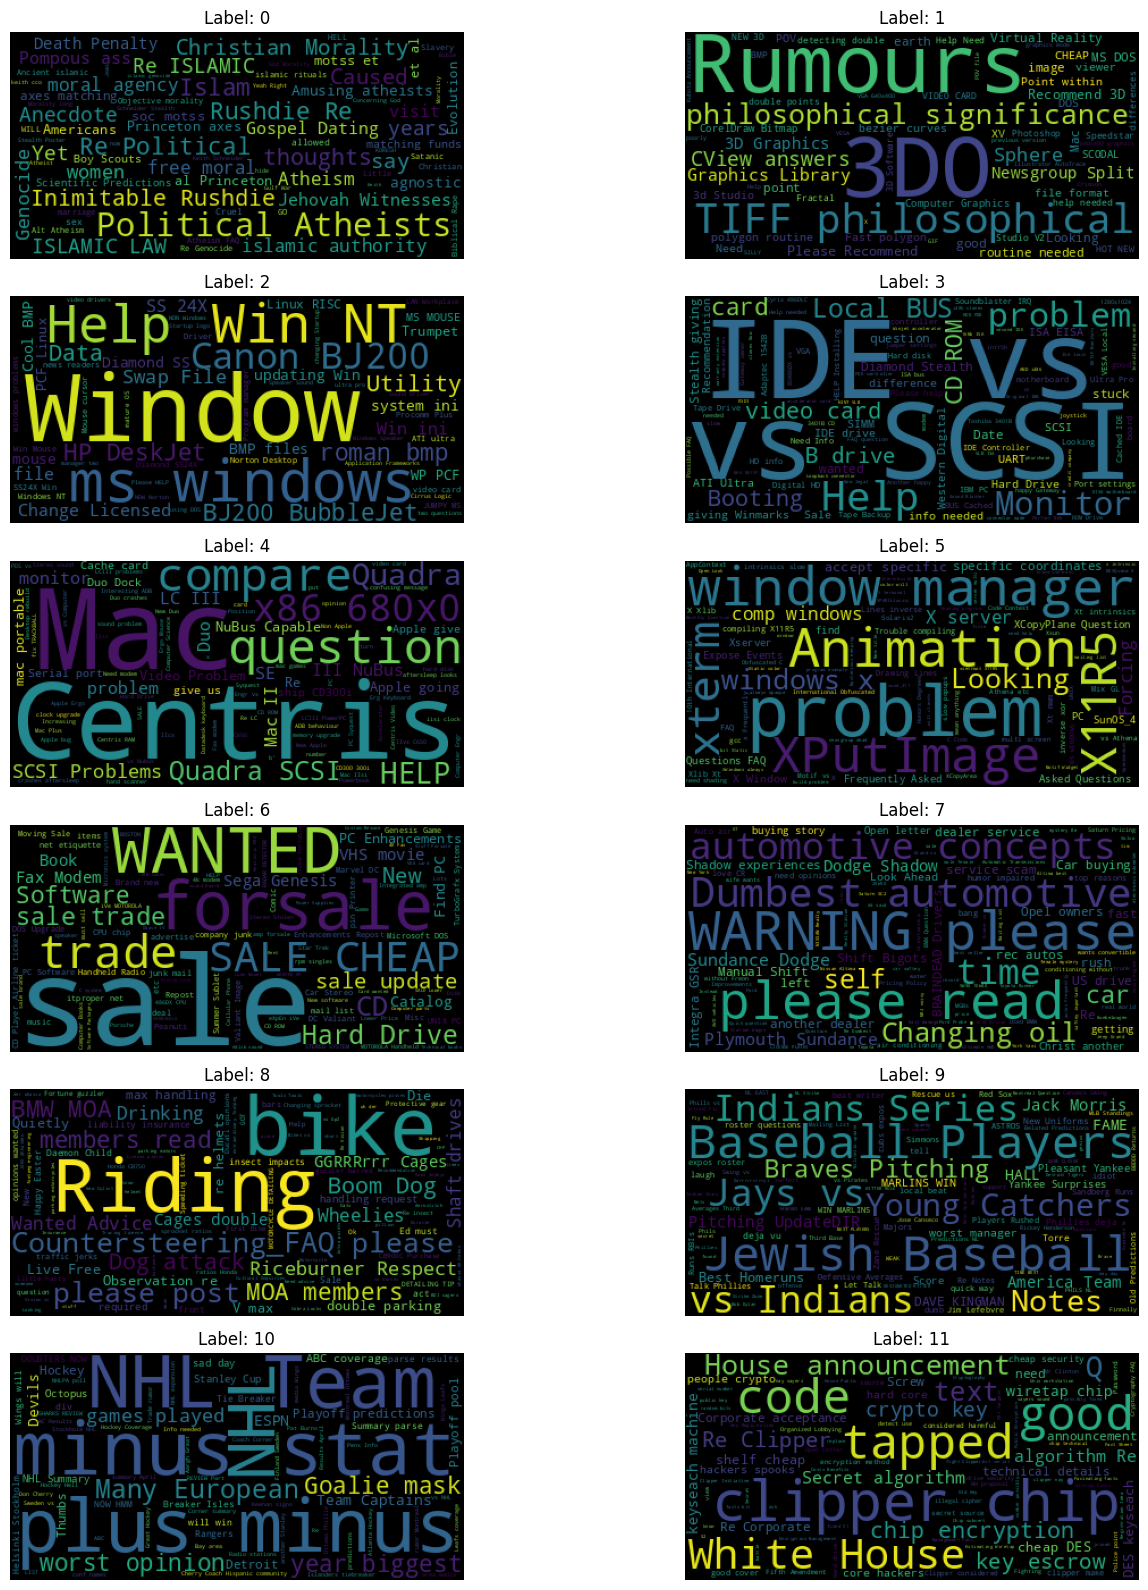

In [55]:
fig, _axs = plt.subplots(nrows=6, ncols=2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for _ in range(12):
    axs[_].imshow(get_word_cloud(" ".join(get_from(_))))
    axs[_].set_title(f"Label: {_}")
    axs[_].axis("off")
fig.tight_layout()
plt.show()

## Preprocessing

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(texts)

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
print(embeddings.shape)
print(embeddings[0][0:20])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2 ** 6)  #64
features = pca.fit_transform(embeddings)

In [ ]:
print(features.shape)

In [ ]:
test_features = features[0:10000]
print(test_features.shape)
print(test_features[9])

In [ ]:
from src.DBScan import DBScan

scanner = DBScan(radius=0.05, min_dense=10)

clusters = scanner.make_clusters(features)

In [ ]:
import numpy as np

print(clusters[99])
print(len(np.where(clusters == 0)))

### Using the DBScan elbow method